# Breast Cancer Dataset


---

## Import Libraries

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [333]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/feliciastevany/DataMiningW2/refs/heads/main/breast-cancer.csv') # Read the csv dataset
df.sample(10) # Showing 10 random sample rows of the dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
183,873843,B,11.410,14.92,73.53,402.0,0.09059,0.08155,0.06181,0.02361,...,12.370,17.70,79.12,467.2,0.11210,0.16100,0.16480,0.06296,0.1811,0.07427
532,91903902,B,13.680,16.33,87.76,575.5,0.09277,0.07255,0.01752,0.01880,...,15.850,20.20,101.60,773.4,0.12640,0.15640,0.12060,0.08704,0.2806,0.07782
106,863031,B,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
553,924342,B,9.333,21.94,59.01,264.0,0.09240,0.05605,0.03996,0.01282,...,9.845,25.05,62.86,295.8,0.11030,0.08298,0.07993,0.02564,0.2435,0.07393
354,901011,B,11.140,14.07,71.24,384.6,0.07274,0.06064,0.04505,0.01471,...,12.120,15.82,79.62,453.5,0.08864,0.12560,0.12010,0.03922,0.2576,0.07018
274,8911163,M,17.930,24.48,115.20,998.9,0.08855,0.07027,0.05699,0.04744,...,20.920,34.69,135.10,1320.0,0.13150,0.18060,0.20800,0.11360,0.2504,0.07948
45,857010,M,18.650,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.10090,...,22.820,21.32,150.60,1567.0,0.16790,0.50900,0.73450,0.23780,0.3799,0.09185
343,898431,M,19.680,21.68,129.90,1194.0,0.09797,0.13390,0.18630,0.11030,...,22.750,34.66,157.60,1540.0,0.12180,0.34580,0.47340,0.22550,0.4045,0.07918
253,8860702,M,17.300,17.08,113.00,928.2,0.10080,0.10410,0.12660,0.08353,...,19.850,25.09,130.90,1222.0,0.14160,0.24050,0.33780,0.18570,0.3138,0.08113
497,914580,B,12.470,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,...,14.060,24.34,92.82,607.3,0.12760,0.25060,0.20280,0.10530,0.3035,0.07661


## Exploratory Data Analysis

2. Display the info column

In [334]:
#2
df.info() # Showing the info of all the column including datatype

# To check the detail information of each columns from the dataset. As shown, there are 32 columns in total with 569 entries data on each column.
# The result also shows the data type of each column, with diagnosis column as the target table.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

3. Describe column

In [335]:
#3
dfdrop = df.drop(['id', 'diagnosis'], axis=1)
description = dfdrop.describe().round(1)
description # showing the description of the column

# Result
# Description table shows the numerical values of all the column with numerical attributes. As shown, the highest range is the area_mean column which is ranging from 143.5 - 2501.
# On the other hand, the lowest range is fractal_dimension_mean that is ranging from 0.0 - 0.1.

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,...,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0
mean,14.1,19.3,92.0,654.9,0.1,0.1,0.1,0.0,0.2,0.1,...,16.3,25.7,107.3,880.6,0.1,0.3,0.3,0.1,0.3,0.1
std,3.5,4.3,24.3,351.9,0.0,0.1,0.1,0.0,0.0,0.0,...,4.8,6.1,33.6,569.4,0.0,0.2,0.2,0.1,0.1,0.0
min,7.0,9.7,43.8,143.5,0.1,0.0,0.0,0.0,0.1,0.0,...,7.9,12.0,50.4,185.2,0.1,0.0,0.0,0.0,0.2,0.1
25%,11.7,16.2,75.2,420.3,0.1,0.1,0.0,0.0,0.2,0.1,...,13.0,21.1,84.1,515.3,0.1,0.1,0.1,0.1,0.3,0.1
50%,13.4,18.8,86.2,551.1,0.1,0.1,0.1,0.0,0.2,0.1,...,15.0,25.4,97.7,686.5,0.1,0.2,0.2,0.1,0.3,0.1
75%,15.8,21.8,104.1,782.7,0.1,0.1,0.1,0.1,0.2,0.1,...,18.8,29.7,125.4,1084.0,0.1,0.3,0.4,0.2,0.3,0.1
max,28.1,39.3,188.5,2501.0,0.2,0.3,0.4,0.2,0.3,0.1,...,36.0,49.5,251.2,4254.0,0.2,1.1,1.3,0.3,0.7,0.2


4. display the number of each unique value for categorical column

In [336]:
#4
# Showing the number of unique value on diagnosis column
diagnosis_counts = df['diagnosis'].value_counts(dropna=False)
print(diagnosis_counts)

# Result
# The result is B values has the highest total data entries based on the dataset.
# Notes:
# B: Benign or non-cancerous, M: Malignant (cancerous).

diagnosis
B    357
M    212
Name: count, dtype: int64


5. Null handling

In [337]:
#5
missing = df.isnull().sum() # check if there is still a null values
missing # showing the number of missing value

# Result
# There is no any missing values on every columns. It means all the columns has it value.

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


6. Visualization

<ipython-input-338-220e7af3385f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette="pastel")


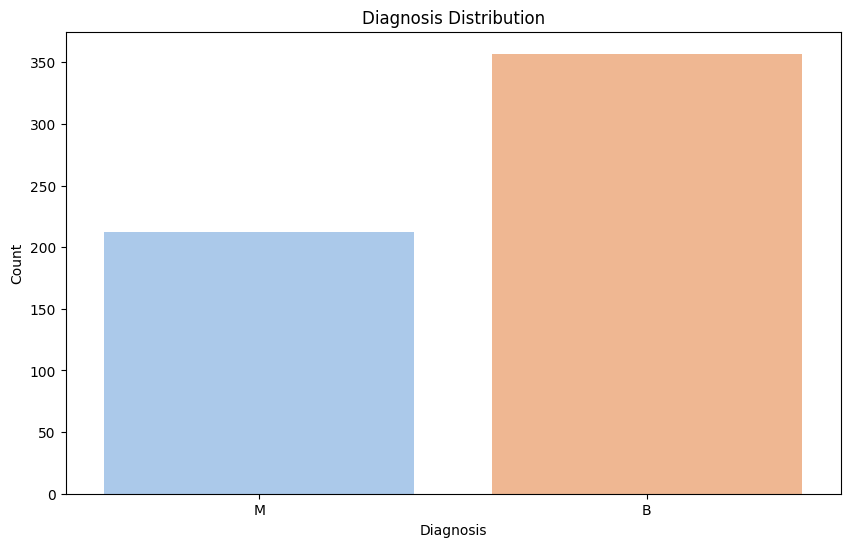

In [338]:
# Bar Chart of Diagnosis distribution
diagnosis_counts = df['diagnosis'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x='diagnosis', data=df, palette="pastel")

plt.title("Diagnosis Distribution")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

# Conclusion
# The chart shows two types of diagnoses, labeled as 1 and 2. Diagnosis 1 is more common, with over 350 cases, while diagnosis 2 has around 200 cases.
# This means there are more cases with diagnosis 1 than with diagnosis 2 in this data.

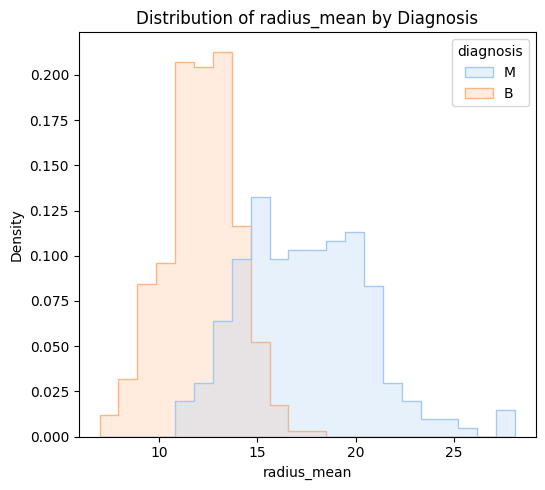

In [339]:
# Histogram Distribution of radius_mean, texture_mean, and area_mean by diagnosis
plt.figure(figsize=(15, 5))
features = ['radius_mean']

plt.subplot(1, 3, 1)
sns.histplot(data=df, x=features[0], hue="diagnosis", element="step", stat="density", common_norm=False, palette="pastel")
plt.title(f"Distribution of {features[0]} by Diagnosis")
plt.xlabel(features[0])
plt.ylabel("Density")

plt.tight_layout()
plt.show()

# Conclusion
# The histogram displays the distribution of the "radius_mean" feature for the two diagnoses. We can see that the distribution for diagnosis 1 is shifted to the
# left of diagnosis 2, indicating that tumors with diagnosis 1 generally have smaller average radius than those with diagnosis 2. This difference suggests that
# "radius_mean" could be a valuable feature for distinguishing between the two diagnoses.

7. Check unique value of target variable

In [340]:
#7
unique_values = df['diagnosis'].unique() # Checking unique values in diagnosis column
print(unique_values) # Showing unique values in diagnosis column

['M' 'B']


8. Encoding the target columns

In [341]:
#8
encoder = LabelEncoder() # create a LabelEncoder to encode the categorical columns

# apply lable encoding to specific categorical columns (island and sex)
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])+1 # 1 for B and 2 for M

df.head() # showing the first 5 encoded columns

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,2,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,2,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,2,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


10. create a heatmap to see the correlation and explain the conclusion

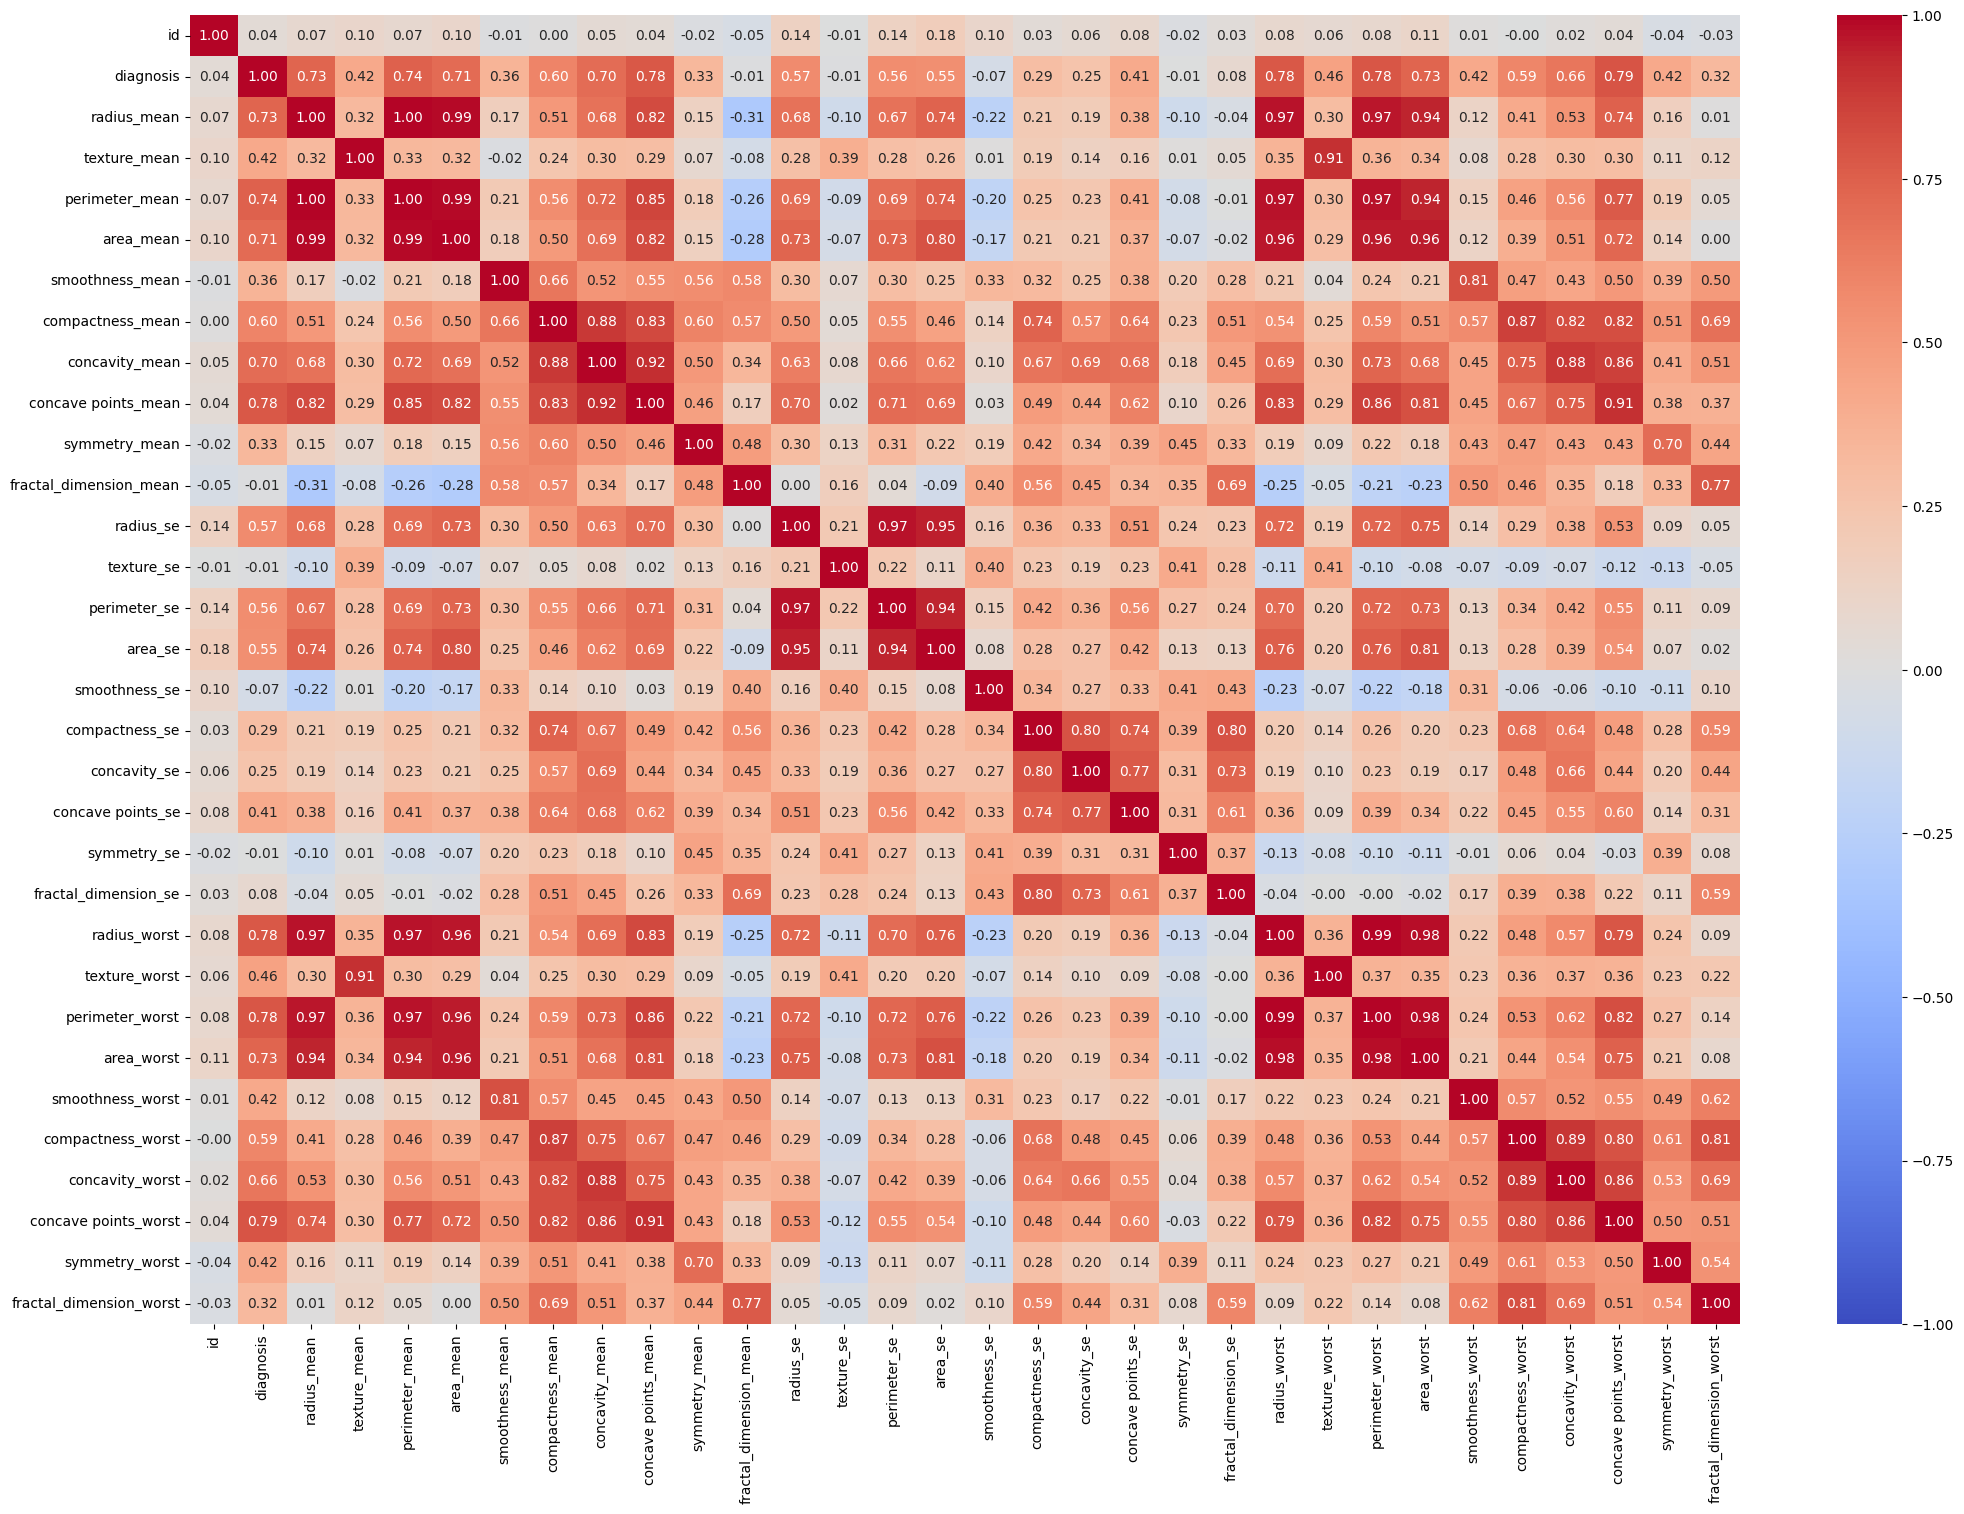

In [342]:
#10
corr_matrix = df.corr()

plt.figure(figsize=(25, 17))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('')
plt.show() #Showing the heatmap result

# Conclusion
# This heatmap shows how different features in the dataset are related to each other. Dark red squares mean a strong positive relationship, where if one feature goes up,
# the other also tends to go up. Dark blue squares mean a strong negative relationship, where if one feature goes up, the other tends to go down.
# Some features like radius_mean, perimeter_mean, and area_mean have strong positive relationships with each other, meaning they tend to increase together.
# Similar strong relationships are seen with radius_worst, perimeter_worst, and area_worst. Other features, like fractal_dimension_mean, don’t have strong relationships with most features.

## Machine Learning

1. Splitting X and y

In [343]:
#1
# X is the predicting variable, and y is the predicted variable (target)
X = df.drop(['id', 'diagnosis'], axis = 1)
y = df['diagnosis']

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [344]:
#2
# Splitting the data to traning and test using train test, with test size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [345]:
#3
# Checking how many rows and columns in each train and test data
X_train.shape, X_test.shape

((455, 30), (114, 30))

## Desicion Tree


---

1. Criterion Entropy

Defining the model

In [346]:
#Criterion Entropy
# Modelling using criterion entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state=0)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Predict the test set results

In [347]:
# Predict X-test with creation entropy model
y_pred_entropy = clf_entropy.predict(X_test)

Acurracy Score

In [348]:
# Accuracy score using y_test and y_pred
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print(f"Model accuracy score with criterion entropy: {accuracy_gini * 100:.2f}%") # Showing accuracy score using y_test and y_pred

Model accuracy score with criterion entropy: 93.86%


Check for overfitting and underfitting

In [349]:
y_train_entropy = clf_entropy.predict(X_train)

# Accuracy for test and train using creation entropy model
test_accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
training_accuracy_entropy = accuracy_score(y_train, y_train_entropy)

# Showing testing and training accuracy based on train and test data
print(f"Testing accuracy: {test_accuracy_entropy * 100:.2f}%")
print(f"Testing accuracy: {training_accuracy_entropy * 100:.2f}%")

Testing accuracy: 95.61%
Testing accuracy: 98.02%


Visualize decision trees

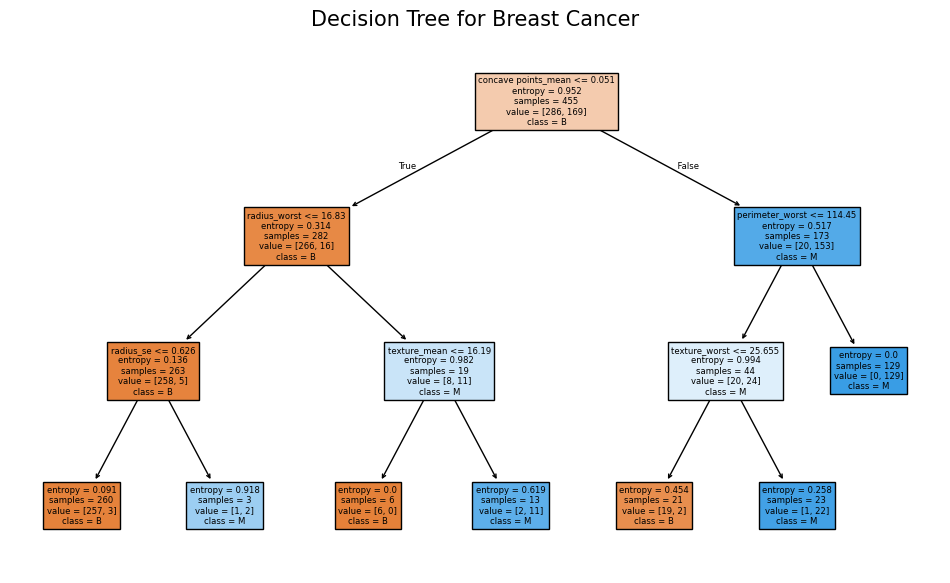

In [350]:
from sklearn import tree

# Plot the tree using the criterion entropy model
plt.figure(figsize=(12,7))
tree.plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['B', 'M'])
plt.title("Decision Tree for Breast Cancer", fontsize=15)
plt.show()

2. Criterion Gini index

Defining the model

In [351]:
# Modelling using criterion gini
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

Predict the test set results

In [352]:
# Predict X-test with criterion gini model
y_pred_gini = clf_gini.predict(X_test)

Accuracy Score

In [353]:
# Accuracy score using y_test and y_pred
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print(f"Model accuracy score with criterion gini: {accuracy_gini * 100:.2f}%") # Showing accuracy score using y_test and y_pred

Model accuracy score with criterion gini: 93.86%


Check for overfitting and underfitting

In [354]:
y_train_gini = clf_gini.predict(X_train)

# Accuracy for test and train using criterion gini model
test_accuracy_gini = accuracy_score(y_test, y_pred_gini)
training_accuracy_gini = accuracy_score(y_train, y_train_gini)

# Showing testing and training accuracy based on train and test data
print(f"Testing accuracy: {test_accuracy_gini * 100:.2f}%")
print(f"Testing accuracy: {training_accuracy_gini * 100:.2f}%")

Testing accuracy: 93.86%
Testing accuracy: 97.80%


Visualize decision trees

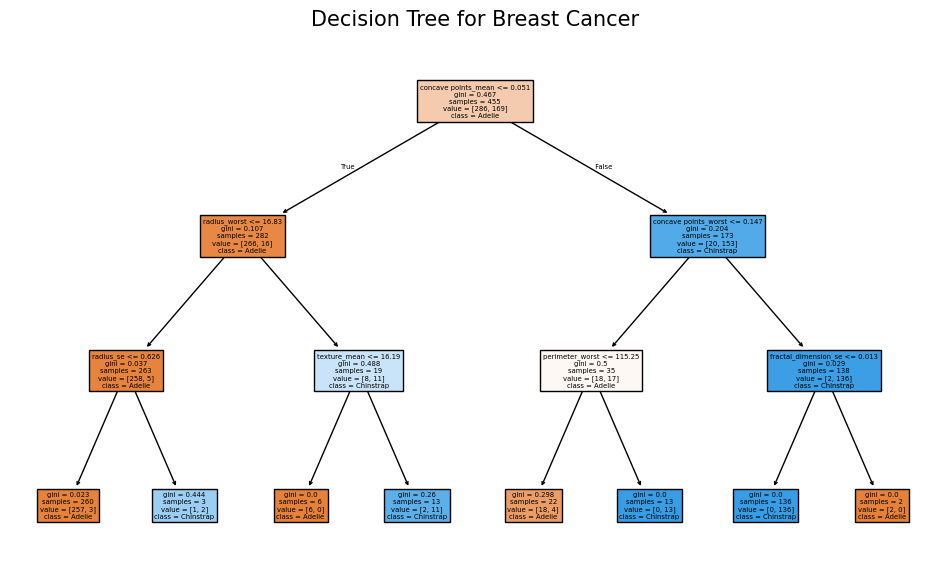

In [355]:
# Plot the tree for the criterion gini model
plt.figure(figsize=(12,7))
tree.plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['Adelie', 'Chinstrap', 'Gentoo'])
plt.title("Decision Tree for Breast Cancer", fontsize=15)
plt.show()

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [356]:
# Confusion matrix of criterion entropy and criterion gini model
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
cm_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix (Entropy):\n", cm_entropy)
print("Confusion Matrix (Gini):\n", cm_gini)

Confusion Matrix (Entropy):
 [[70  1]
 [ 4 39]]
Confusion Matrix (Gini):
 [[68  3]
 [ 4 39]]


In [357]:
# Classification report of criterion entropy and criterion gini model
clf_report_entropy = classification_report(y_test, y_pred_entropy)
clf_report_gini = classification_report(y_test, y_pred_gini)

print("Classification Report Entropy: \n", clf_report_entropy)
print("Classification Report Gini Index: \n", clf_report_gini)

Classification Report Entropy: 
               precision    recall  f1-score   support

           1       0.95      0.99      0.97        71
           2       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Classification Report Gini Index: 
               precision    recall  f1-score   support

           1       0.94      0.96      0.95        71
           2       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



Result & Conclusion

In [358]:
#h
# Result
# The result for both models show that they made some correct predictions but also some wrong ones. The entropy model seems to be slightly better at predicting
# correctly (96%) than the Gini model (94%). Both models have trouble predicting class 2, as seen by the lower recall values for this class.

# Conclusion
# Overall, the models perform good, but there's room for improvement. The lower recall for class 2 suggests that the models might be better at identifying
# instances of class 1 but struggle to correctly classify instances of class 2. We could explore further investigation and potential model adjustments to
# upgrade the performance, especially for class 2 predictions.

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [359]:
#a
nb_model = GaussianNB()

nb_model.fit(X_train, y_train) # Modelling using Naive Bayes

GaussianNB()

In [360]:
#b
# Predicting the test set results using Naive Bayes
y_pred_nb = nb_model.predict(X_test)

In [361]:
#c
# Showing accuracy score using y_test and y_pred
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Model accuracy score: {accuracy_nb * 100:.2f}%")

#d
# Showing confusion matrix of Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:\n", cm_nb)

Model accuracy score: 97.37%
Confusion Matrix:
 [[71  0]
 [ 3 40]]


In [362]:
#e
# Showing the classification report based on y test and y pred
clf_report_nb = classification_report(y_test, y_pred_nb)

print("Classification Report:\n", clf_report_nb)

Classification Report:
               precision    recall  f1-score   support

           1       0.96      1.00      0.98        71
           2       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [363]:
#f
# Result
# The confusion matrix and classification report indicate that the model has achieved a high level of accuracy (97.37%).
# It correctly predicted 71 out of 71 instances of class 1 and 40 out of 43 instances of class 2.
# The precision, recall, and F1-score for both classes are also very high, demonstrating the model's effectiveness in both identifying and classifying instances of each class.

# Conclusion
# The model works really well for classifying things. It can correctly identify both types of things with high accuracy.
# This makes it a reliable tool for making decisions based on its predictions.

## K-Nearest Neighbors


---

In [364]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Standardize the features with scaled data

In [365]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train the classifier (choose K=5 as an example)

In [366]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Make predictions on the test data

In [367]:
y_pred_knn = knn.predict(X_test)

Accuracy Score

In [368]:
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.74%


Confusion Matrix

In [369]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm_knn)

# Printing the confusion matrix using KNN Classification

Confusion Matrix:
[[68  3]
 [ 3 40]]


Classification Report

In [370]:
clf_report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report:")
print(clf_report_knn)

# Printing the classification report using KNN Classification

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.96      0.96        71
           2       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Result & Conclusion KNN

In [371]:
# Result and Conclusion KNN
# The confusion matrix and classification report show that the model is performing well, but not perfectly. While the model has a high accuracy of 95%,
# there are some errors. The model is better at predicting class 1 (with a precision and recall of 0.96), but it struggles more with class 2 (precision
# and recall of 0.93). This could mean that the model is more confident in its predictions for class 1.

## Entropy, Gini, NB, KNN

In [372]:
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("Classification Report Entropy: \n", cm_entropy)
print("Classification Report Gini Index: \n", cm_gini)
print("Classification Report Naive Bayes: \n", cm_nb)
print("Classification Report Random Forest: \n", cm_knn)

Classification Report Entropy: 
 [[70  1]
 [ 4 39]]
Classification Report Gini Index: 
 [[68  3]
 [ 4 39]]
Classification Report Naive Bayes: 
 [[71  0]
 [ 3 40]]
Classification Report Random Forest: 
 [[68  3]
 [ 3 40]]


In [373]:
clf_report_entropy = classification_report(y_test, y_pred_entropy)
clf_report_gini = classification_report(y_test, y_pred_gini)
clf_report_nb = classification_report(y_test, y_pred_nb)
clf_report_knn = classification_report(y_test, y_pred_knn)

print("Classification Report Entropy: \n", clf_report_entropy)
print("Classification Report Gini Index: \n", clf_report_gini)
print("Classification Report Naive Bayes: \n", clf_report_nb)
print("Classification Report Random Forest: \n", clf_report_knn)

Classification Report Entropy: 
               precision    recall  f1-score   support

           1       0.95      0.99      0.97        71
           2       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Classification Report Gini Index: 
               precision    recall  f1-score   support

           1       0.94      0.96      0.95        71
           2       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Classification Report Naive Bayes: 
               precision    recall  f1-score   support

           1       0.96      1.00      0.98        71
           2       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.9

Conclusion

In [374]:
# Based on the cpnfusion matrix and classification reports, the Naive Bayes model appears to be the best-performing model among the four evaluated.
# It achieves the highest accuracy (0.98), precision (0.98 for class 1 and 1.00 for class 2), and recall (1.00 for class 1 and 0.93 for class 2).
# This indicates that the Naive Bayes model is capable of accurately identifying both classes and making correct predictions with high confidence.
# While the other models also perform well, the Naive Bayes model consistently outperforms them across all metrics.